In [180]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# EDA
## Univarate
### Explore overview
#### Numberic analysis

In [181]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('/kaggle/input/titanic/train.csv')
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp       Parch        Fare
count   712.000000  712.000000  712.000000  572.000000  712.000000  712.000000  712.000000
mean    448.234551    0.376404    2.330056   29.498846    0.553371    0.379213   32.586276
std     256.731423    0.484824    0.824584   14.500059    1.176404    0.791669   51.969529
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     224.750000    0.000000    2.000000   21.000000    0.000000    0.000000    7.925000
50%     453.500000    0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     673.500000    1.000000    3.000000   38.000000    1.000000    0.000000   30.500000
max     891.000000    1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


#### Categorical analysis

In [182]:
print(train_data.describe(include = ['object']))

                       Name   Sex    Ticket        Cabin Embarked
count                   712   712       712          159      710
unique                  712     2       558          117        3
top     Partner, Mr. Austen  male  CA. 2343  C23 C25 C27        S
freq                      1   467         7            4      525


- **Describe Data:**
  - **PassengerId:** ID of passenger
  - **Pclass:** Class of ticket
  - **Survived:** Survival
  - ****

### Validate missing value

In [183]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        159 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [184]:
train_data = train_data.drop(columns=['Cabin'])
train_data = train_data.drop(columns=['PassengerId'])
train_data = train_data.drop(columns=['Name'])
train_data = train_data.drop(columns=['Ticket'])
median_age = train_data['Age'].median()
train_data['Age'] = train_data['Age'].fillna(median_age)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  710 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


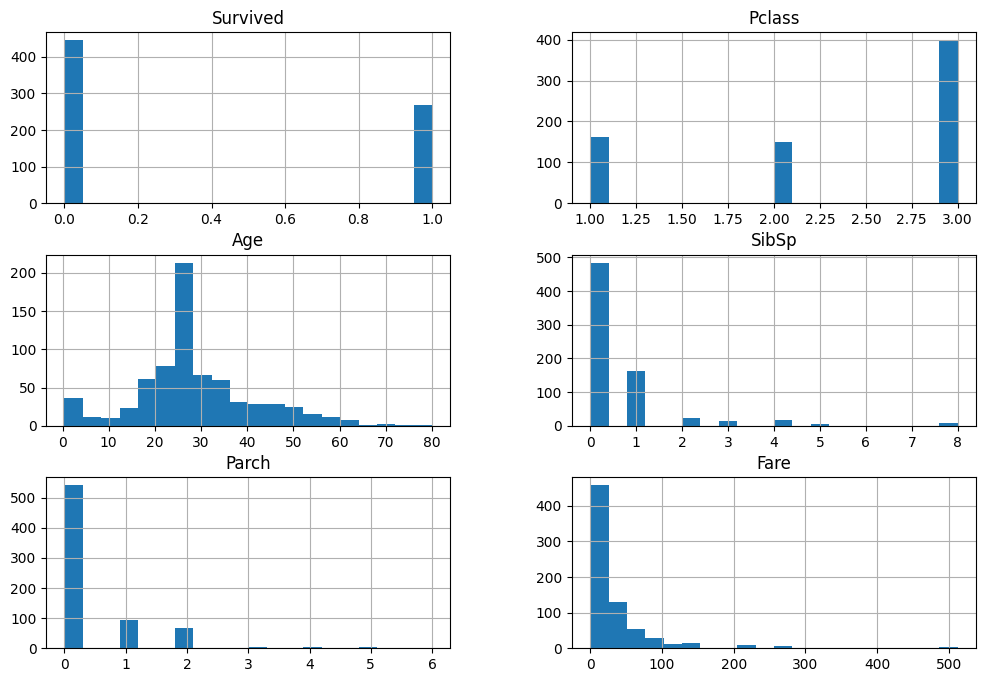

In [185]:
import matplotlib.pyplot as plt
train_data.hist(figsize=(12, 8), bins=20)
plt.show()

## Bivarate

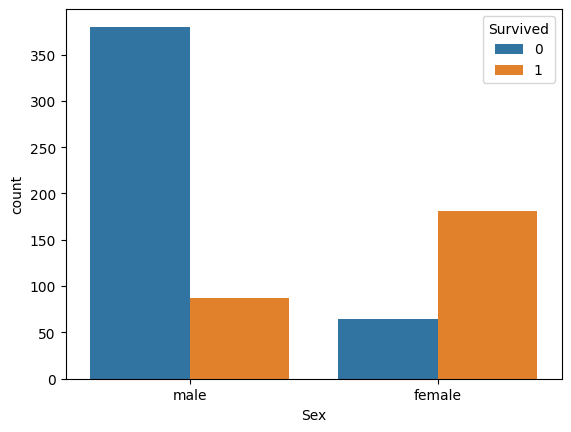

Survived,0,1
Pclass,,
1,0.392638,0.607362
2,0.516556,0.483444
3,0.758794,0.241206


In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giới tính vs Survived
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.show()

# Pclass vs Survived
pd.crosstab(train_data['Pclass'], train_data['Survived'], normalize='index')

In [187]:
df_selected = train_data
print(df_selected)

     Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
331         0       1    male  45.5      0      0   28.5000        S
733         0       2    male  23.0      0      0   13.0000        S
382         0       3    male  32.0      0      0    7.9250        S
704         0       3    male  26.0      1      0    7.8542        S
813         0       3  female   6.0      4      2   31.2750        S
..        ...     ...     ...   ...    ...    ...       ...      ...
106         1       3  female  21.0      0      0    7.6500        S
270         0       1    male  28.0      0      0   31.0000        S
860         0       3    male  41.0      2      0   14.1083        S
435         1       1  female  14.0      1      2  120.0000        S
102         0       1    male  21.0      0      1   77.2875        S

[712 rows x 8 columns]


**Merge SibSp and Parch to FamilySize**

In [188]:
df_selected = df_selected.copy()
# df_selected['FamilySize'] = df_selected['SibSp'] + df_selected['Parch'] + 1
# df_selected['IsAlone'] = (df_selected['FamilySize'] == 1).astype(int)
df_selected['Sex'] = df_selected['Sex'].map({'male': 0, 'female': 1})
# df_selected['Embarked'] = df_selected['Embarked'].map({'C': 0, 'Q': 1,'S':2})
print(df_selected)

     Survived  Pclass  Sex   Age  SibSp  Parch      Fare Embarked
331         0       1    0  45.5      0      0   28.5000        S
733         0       2    0  23.0      0      0   13.0000        S
382         0       3    0  32.0      0      0    7.9250        S
704         0       3    0  26.0      1      0    7.8542        S
813         0       3    1   6.0      4      2   31.2750        S
..        ...     ...  ...   ...    ...    ...       ...      ...
106         1       3    1  21.0      0      0    7.6500        S
270         0       1    0  28.0      0      0   31.0000        S
860         0       3    0  41.0      2      0   14.1083        S
435         1       1    1  14.0      1      2  120.0000        S
102         0       1    0  21.0      0      1   77.2875        S

[712 rows x 8 columns]


In [189]:
df_new = df_selected.drop(columns=['SibSp','Parch',"Embarked"])
X = df_new.drop(columns=['Survived'])
y = df_new['Survived']
print(X)

     Pclass  Sex   Age      Fare
331       1    0  45.5   28.5000
733       2    0  23.0   13.0000
382       3    0  32.0    7.9250
704       3    0  26.0    7.8542
813       3    1   6.0   31.2750
..      ...  ...   ...       ...
106       3    1  21.0    7.6500
270       1    0  28.0   31.0000
860       3    0  41.0   14.1083
435       1    1  14.0  120.0000
102       1    0  21.0   77.2875

[712 rows x 4 columns]


In [190]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred):.4f} - F1: {f1_score(y_test, y_pred):.4f}")


LogisticRegression - Accuracy: 0.7972 - F1: 0.7387
RandomForest - Accuracy: 0.8182 - F1: 0.7636
DecisionTree - Accuracy: 0.7902 - F1: 0.7222
KNN - Accuracy: 0.6364 - F1: 0.4694
SVM - Accuracy: 0.6573 - F1: 0.3288


In [194]:
from sklearn.ensemble import RandomForestClassifier

# X, y từ toàn bộ train.csv
X = df.drop(columns=['Survived'])
y = df['Survived']
X.info()
# Train model trên toàn bộ train
# final_model = RandomForestClassifier(random_state=42, n_estimators=100)
# final_model.fit(X, y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
